In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
D = 3
N = 1e7
true_nlist = [1.5] + list(range(2, 21))
true_nlist = [1.5, 2, 4, 8, 16]
#true_nlist = list(range(2, 21))
m = 2/3
nlist = [round((tnn-2*m)/(1-m),4) for tnn in true_nlist]
s = 1.0
sc = 1.0
c = s / sc
L = 1.0
num_empty = 200
res_dir = 'nsc-friday'
randix = 0

0
1
2
3
4


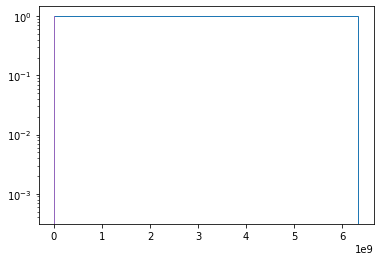

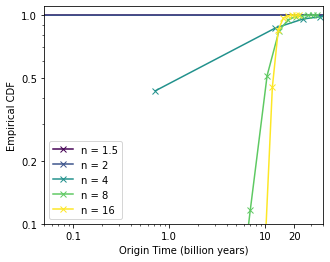

In [81]:
plot_data = []
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    res = pd.read_csv(fout+'.csv')
    res_years = pd.read_csv(fout+'_years.txt')
    #display(res.head())
    #display(res_years.head())
    #print(res.shape)
    #print(res_years.shape)
    #plt.figure()
    (counts, bins, patches) = plt.hist(
        res_years.OriginTime, cumulative=True, histtype='step', density=True, log=True)
    plot_data.append((bins[0:-1], counts))
fig = plt.figure(figsize=(5,4))
for nix, truen in enumerate(true_nlist):
    print(nix)
    (bins, counts) = plot_data[nix]
    plt.plot(bins, counts, 'x-', color=mycols[nix])
plt.gca().set_xlim(0.1, 50)
leg = [f"n = {nn}" for nn in true_nlist]
plt.gca().set_ylabel('Empirical CDF')
plt.gca().set_xlabel('Origin Time (billion years)')
plt.legend(leg)
fig.savefig('figures-friday/plotA.png', dpi=200)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlim(0.05, 40)
plt.gca().set_ylim(0.1, 1.1)
plt.gca().set_yticks([0.1, 0.2, 0.5, 1.0])
plt.gca().set_yticklabels(['0.1', '0.2', '0.5', '1.0'])
plt.gca().set_xticks([0.1, 1.0, 10, 20])
plt.gca().set_xticklabels(['0.1', '1.0', '10', '20'])
fig.savefig('figures-friday/plotA-loglog.png', dpi=200)

In [17]:
print(true_nlist)

[1.1, 1.2, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [18]:
print(nlist)

[-0.7, -0.4, 0.5, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0, 32.0, 35.0, 38.0, 41.0, 44.0, 47.0, 50.0, 53.0, 56.0]


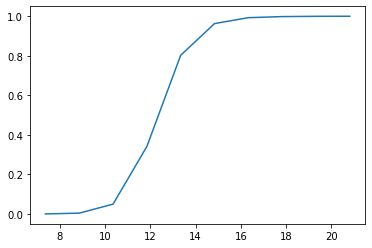

In [34]:
plt.plot(bins[0:-1], counts)